In [1]:
import rasterio as rio
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.tri as tri
import scipy.interpolate

import rasterio.plot

import contextily as cx

import shapely

In [2]:
TOTAL_DEPOSIT_DIR = "C:/Users/mkrooted/Uni/diploma/data/results/TDepCs137"
COORDS_FILE = "C:/Users/mkrooted/Uni/diploma/data/coords.txt"

In [3]:
coords_csv = pd.read_csv(COORDS_FILE, delimiter='\t')

In [4]:
coords_csv

,Cell,Longitude,Latitude
0,0,34.497955,47.423668
1,1,34.511210,47.423492
2,2,34.524464,47.423317
3,3,34.537720,47.423140
4,4,34.550972,47.422962
...,...,...,...
8051,8051,39.404583,50.869087
8052,8052,39.630460,50.856420
8053,8053,39.856170,50.843315
8054,8054,40.081715,50.829780


In [5]:
coords_gdf = gpd.GeoDataFrame(coords_csv, geometry=gpd.points_from_xy(coords_csv.Longitude, coords_csv.Latitude))

In [6]:
coords_gdf[:400]

,Cell,Longitude,Latitude,geometry
0,0,34.497955,47.423668,POINT (34.49795 47.42367)
1,1,34.511210,47.423492,POINT (34.51121 47.42349)
2,2,34.524464,47.423317,POINT (34.52446 47.42332)
3,3,34.537720,47.423140,POINT (34.53772 47.42314)
4,4,34.550972,47.422962,POINT (34.55097 47.42296)
...,...,...,...,...
395,395,34.702270,47.591780,POINT (34.70227 47.59178)
396,396,34.715565,47.591583,POINT (34.71556 47.59158)
397,397,34.728863,47.591385,POINT (34.72886 47.59139)
398,398,34.742157,47.591183,POINT (34.74216 47.59118)


In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [8]:
SMALL_GRID_NUM = 1900

In [9]:
small_coords = coords_gdf[:SMALL_GRID_NUM]
small_coords

,Cell,Longitude,Latitude,geometry
0,0,34.497955,47.423668,POINT (34.49795 47.42367)
1,1,34.511210,47.423492,POINT (34.51121 47.42349)
2,2,34.524464,47.423317,POINT (34.52446 47.42332)
3,3,34.537720,47.423140,POINT (34.53772 47.42314)
4,4,34.550972,47.422962,POINT (34.55097 47.42296)
...,...,...,...,...
1895,1895,35.051640,47.851510,POINT (35.05164 47.85151)
1896,1896,35.078358,47.851030,POINT (35.07836 47.85103)
1897,1897,35.105076,47.850540,POINT (35.10508 47.85054)
1898,1898,35.131790,47.850048,POINT (35.13179 47.85005)


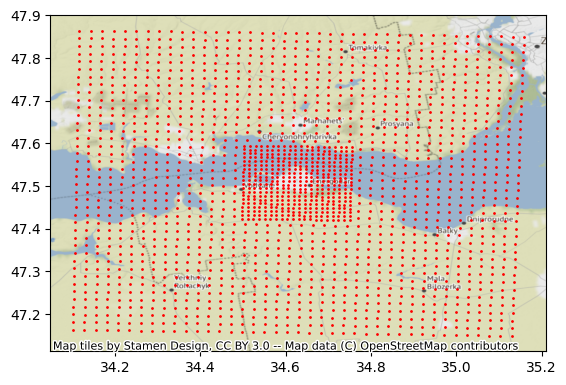

In [10]:
# ax = world[(world['continent'] == 'Europe')].plot(color='white', edgecolor='black')

ax = small_coords.plot(color='red', markersize=1)
# plt.xlim(34.2,35.0), plt.ylim(47.2,48.0)

cx.add_basemap(ax=ax, crs='EPSG:4326')

In [11]:
LLON = np.array(small_coords.Longitude)
LLAT = np.array(small_coords.Latitude)

LON_LIMS = LLON.min(), LLON.max()
LAT_LIMS = LLAT.min(), LLAT.max()
LON_LIMS, LAT_LIMS

((34.101387, 35.158504), (47.148197, 47.864418))

In [85]:
tdep1.head()

,Cell,Longitude,Latitude,Area,01.07.2022 17:41 (UTC),01.07.2022 18:41 (UTC),01.07.2022 19:41 (UTC),01.07.2022 20:41 (UTC),01.07.2022 21:41 (UTC),01.07.2022 22:41 (UTC),...,02.07.2022 08:41 (UTC),02.07.2022 09:41 (UTC),02.07.2022 10:41 (UTC),02.07.2022 11:41 (UTC),02.07.2022 12:41 (UTC),02.07.2022 13:41 (UTC),02.07.2022 14:41 (UTC),02.07.2022 15:41 (UTC),02.07.2022 16:41 (UTC),Unnamed: 28
0,0,34.497955,47.423668,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,688.45480,688.45480,688.45480,688.45480,688.45480,688.45480,688.45480,688.45480,688.45480,NaN
1,1,34.511210,47.423492,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,611.99854,611.99854,611.99854,611.99854,611.99854,611.99854,611.99854,611.99854,611.99854,NaN
2,2,34.524464,47.423317,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,539.01840,539.01840,539.01840,539.01840,539.01840,539.01840,539.01840,539.01840,539.01840,NaN
3,3,34.537720,47.423140,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,751.21967,751.21967,751.21967,751.21967,751.21967,751.21967,751.21967,751.21967,751.21967,NaN
4,4,34.550972,47.422962,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.94310,1068.94310,1068.94310,1068.94310,1068.94310,1068.94310,1068.94310,1068.94310,1068.94310,NaN


In [87]:
file1 = "tdep_01072022.Cs-137"
tdep1 = pd.read_csv(f"{file1}", delimiter='\t', header=2)
tdep1 = tdep1[tdep1.columns[-2]][:SMALL_GRID_NUM]
tdep1

0        688.45480
1        611.99854
2        539.01840
3        751.21967
4       1068.94310
           ...    
1895       0.00000
1896       0.00000
1897       0.00000
1898       0.00000
1899       0.00000
Name: 02.07.2022 16:41 (UTC), Length: 1900, dtype: float64

In [88]:
class NullableNearestNDInterpolator(sp.interpolate.NearestNDInterpolator):
    def __init__(self, x, y, max_distance):
        sp.interpolate.NearestNDInterpolator.__init__(self, x, y)
        self.max_d = max_distance
        
    def set_max_distance(self, max_d):
        self.max_d = max_d

    def __call__(self, *args):
        xi = self._ndim_coords_from_arrays(args, ndim=self.points.shape[1])
        xi = self._check_call_shape(xi)
        xi = self._scale_x(xi)
        dist, i = self.tree.query(xi, distance_upper_bound=self.max_d)
        if len(args)==2 and isinstance(args[0], float) and isinstance(args[1], float): 
            if i == self.tree.n: 
                return np.nan
            return self.values[i]
        notfound = (i == self.tree.n) 
        i[notfound] = 0
        ans = self.values[i]
        ans[notfound] = np.nan
        return ans
    
    # https://github.com/scipy/scipy/blob/v1.10.1/scipy/interpolate/interpnd.pyx
    def _ndim_coords_from_arrays(self, points, ndim=None):
        if isinstance(points, tuple) and len(points) == 1:
            # handle argument tuple
            points = points[0]
        if isinstance(points, tuple):
            p = np.broadcast_arrays(*points)
            n = len(p)
            for j in range(1, n):
                if p[j].shape != p[0].shape:
                    raise ValueError("coordinate arrays do not have the same shape")
            points = np.empty(p[0].shape + (len(points),), dtype=float)
            for j, item in enumerate(p):
                points[...,j] = item
        else:
            points = np.asanyarray(points)
            if points.ndim == 1:
                if ndim is None:
                    points = points.reshape(-1, 1)
                else:
                    points = points.reshape(-1, ndim)
        return points

In [175]:
def regularize(llon_lims, llat_lims, data_llon, data_llat, data, ncols=400, nrows=400, interp='linear'):
    X = np.linspace(llon_lims[0], llon_lims[1], ncols)
    Y = np.linspace(llat_lims[0], llat_lims[1], nrows)
    XX, YY = np.meshgrid(X, Y)
    
    max_distance = 0.25
    if interp == 'linear':
        interp = sp.interpolate.LinearNDInterpolator(list(zip(data_llon, data_llat)), data)
    elif interp == 'nearest':
        interp = sp.interpolate.NearestNDInterpolator(list(zip(data_llon, data_llat)), data)
    elif interp == 'ct':
        interp = sp.interpolate.CloughTocher2DInterpolator(list(zip(data_llon, data_llat)), data)
    else:
        raise ValueError(f"Interp method '{interp}' is invalid. Valid methods: ct, linear, nearest")
    Z = interp(XX, YY)

    return X, Y, Z, interp

---

In [124]:
from pyproj import Geod, CRS
geod = CRS(4326).get_geod()

C:\Users\mkrooted\AppData\Local\Temp\ipykernel_2600\3635610894.py:5: RuntimeWarning: divide by zero encountered in log10
  pcm = ax.pcolormesh(X, Y, np.log10(Z), shading='nearest', cmap='jet', alpha=0.6)


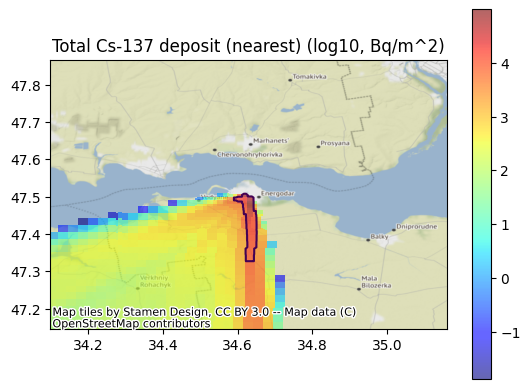

In [171]:
X, Y, Z, interp = regularize(LON_LIMS, LAT_LIMS, LLON, LLAT, tdep1, ncols=200, nrows=200, interp='nearest')

fig,ax = plt.subplots()
# Z[Z==0.0] = np.nan
pcm = ax.pcolormesh(X, Y, np.log10(Z), shading='nearest', cmap='jet', alpha=0.6)
plt.colorbar(pcm, ax=ax)
plt.title('Total Cs-137 deposit (nearest) (log10, Bq/m^2)')
cntr = ax.contour(X, Y, Z, [10000.0])

cx.add_basemap(ax=ax, crs='EPSG:4326')

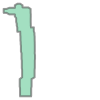

In [172]:
crit_tdep_shape_nearest = shapely.Polygon(cntr.allsegs[0][-1])
crit_tdep_shape_nearest

C:\Users\mkrooted\AppData\Local\Temp\ipykernel_2600\4172960863.py:5: RuntimeWarning: divide by zero encountered in log10
  pcm = ax.pcolormesh(X, Y, np.log10(Z), shading='nearest', cmap='jet', alpha=0.6)


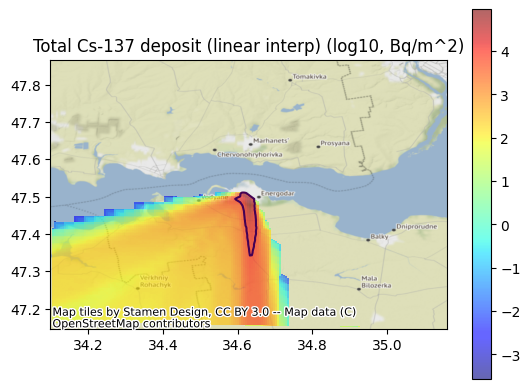

In [168]:
X, Y, Z, interp = regularize(LON_LIMS, LAT_LIMS, LLON, LLAT, tdep1, ncols=200, nrows=200, interp='linear')

fig,ax = plt.subplots()
# Z[Z==0.0] = np.nan
pcm = ax.pcolormesh(X, Y, np.log10(Z), shading='nearest', cmap='jet', alpha=0.6)
plt.colorbar(pcm, ax=ax)
plt.title('Total Cs-137 deposit (linear interp) (log10, Bq/m^2)')
cntr = ax.contour(X, Y, Z, [10000.0])

cx.add_basemap(ax=ax, crs='EPSG:4326')

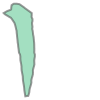

In [169]:
crit_tdep_shape_lin = shapely.Polygon(cntr.allsegs[0][-1])
crit_tdep_shape_lin

C:\Users\mkrooted\AppData\Local\Temp\ipykernel_2600\1498230243.py:7: RuntimeWarning: divide by zero encountered in log10
  pcm = ax.pcolormesh(X, Y, np.log10(Z), shading='nearest', cmap='jet', alpha=0.6)
C:\Users\mkrooted\AppData\Local\Temp\ipykernel_2600\1498230243.py:7: RuntimeWarning: invalid value encountered in log10
  pcm = ax.pcolormesh(X, Y, np.log10(Z), shading='nearest', cmap='jet', alpha=0.6)


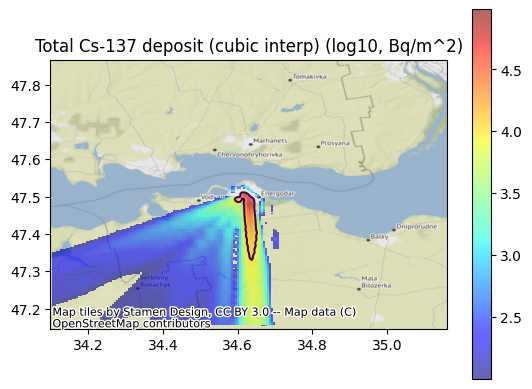

In [180]:
X, Y, Z, interp = regularize(LON_LIMS, LAT_LIMS, LLON, LLAT, tdep1, ncols=200, nrows=200, interp='ct')

Z[np.abs(Z) < 100.0] = 0.0

fig,ax = plt.subplots()
# Z[Z==0.0] = np.nan
pcm = ax.pcolormesh(X, Y, np.log10(Z), shading='nearest', cmap='jet', alpha=0.6)
plt.colorbar(pcm, ax=ax)
plt.title('Total Cs-137 deposit (cubic interp) (log10, Bq/m^2)')
cntr = ax.contour(X, Y, Z, [10000.0])

cx.add_basemap(ax=ax, crs='EPSG:4326')

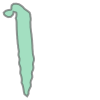

In [181]:
crit_tdep_shape_ct = shapely.Polygon(cntr.allsegs[0][-1])
crit_tdep_shape_ct

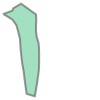

In [182]:
SHAPE = "C:\\Users\\mkrooted\\Uni\\diploma\\data\\shape\\1e4_total_cs137.shp"
shape = gpd.read_file(SHAPE, crs='EPSG:3857').to_crs('EPSG:4326')
poly = shapely.geometry.Polygon(shape.geometry[0])
poly

In [183]:
print("Estimated area:")
print("> nearest:", geod.geometry_area_perimeter(crit_tdep_shape_nearest)[0] / 1e6)
print("> linear:", geod.geometry_area_perimeter(crit_tdep_shape_lin)[0] / 1e6)
print("> cubic:", geod.geometry_area_perimeter(crit_tdep_shape_ct)[0] / 1e6)
print()
S, P = geod.geometry_area_perimeter(poly)
print(f"True Area:", abs(S) / 1e6)

Estimated area:
> nearest: 41.20307550369375
> linear: 35.453003477540626
> cubic: 37.93252777889471

True Area: 32.66156880782365


True Area: 32.66156880782365


---

In [305]:
tdep_gdf = gpd.GeoDataFrame(
    pd.DataFrame({'tdep': tdep1}), 
    geometry=gpd.points_from_xy(LLON, LLAT, crs='EPSG:4326')
    )
df = tdep_gdf.to_crs(epsg=3857)

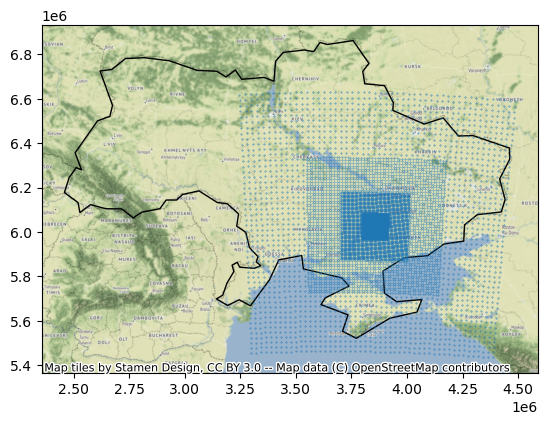

In [307]:
ax = world[(world['name'] == 'Ukraine')].to_crs(epsg=3857).plot(color='none', edgecolor='black')
ax = df.plot(ax=ax, markersize=0.1)
cx.add_basemap(ax=ax)

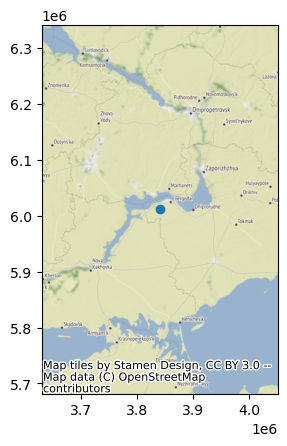

In [318]:
# ax = world[(world['name'] == 'Ukraine')].to_crs(epsg=3857).plot(color='none', edgecolor='black')
df = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy([LLON[0]], [LLAT[0]], crs='EPSG:4326')
    )
df = df.to_crs(epsg=3857)
ax = df.plot()
cx.add_basemap(ax)

In [300]:
world[(world['name'] == 'Ukraine')].crs.to_string()

'EPSG:4326'

In [290]:
Ukraine = cx.Place("Ukraine", path="Ukraine.tif")

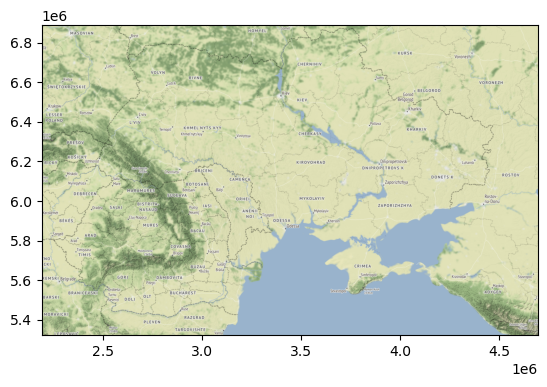

<Axes: >

In [293]:
rasterio.plot.show(rasterio.open('Ukraine.tif'))

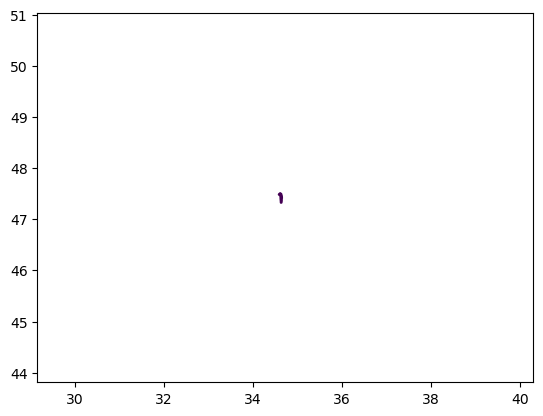

In [204]:
plt.contour(X, Y, Z, [10000])